In [1]:
class NeuralNetWork:
    def  __init__(self):
        '''
        初始化网络，设置输入层，中间层，输出层的节点数
        '''
        pass
    def  fit(self):
        '''
        根据训练数据，不断更新神经网络层之间的链路权重
        '''
        pass
    def  evaluate(self):
        '''
        输入新数据，网络给出对新数据的判断结果
        '''
        pass
    

In [2]:
class NeuralNetWork:
    def  __init__(self, inputnodes, hiddenodes, outputnodes, learningRate):
        '''
        初始化网络，设置输入层，中间层，输出层的节点数
        '''
        self.input_nodes = inputnodes
        self.hidden_nodes = hiddenodes
        self.output_nodes = outputnodes
        
        self.lr = learningRate
        
        pass
    def  fit(self):
        '''
        根据训练数据，不断更新神经网络层之间的链路权重
        '''
        pass
    def  evaluate(self):
        '''
        输入新数据，网络给出对新数据的判断结果
        '''
        pass
    

In [3]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3
n = NeuralNetWork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
class NeuralNetWork:
    def  __init__(self, inputnodes, hiddenodes, outputnodes, learningRate):
        '''
        初始化网络，设置输入层，中间层，输出层的节点数
        '''
        self.input_nodes = inputnodes
        self.hidden_nodes = hiddenodes
        self.output_nodes = outputnodes
        
        self.lr = learningRate
        
        '''
        初始化权重矩阵，我们有两个权重矩阵，一个是wih表示输入层和中间层节点间链路权重形成的矩阵
        一个是who,表示中间层和输出层间链路权重形成的矩阵
        '''
        self.wih = numpy.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        self.who = numpy.random.rand(self.output_nodes, self.hidden_nodes) - 0.5
        
        pass
    def  fit(self):
        '''
        根据训练数据，不断更新神经网络层之间的链路权重
        '''
        pass
    def  evaluate(self):
        '''
        输入新数据，网络给出对新数据的判断结果
        '''
        pass
    

In [5]:
import numpy
import scipy.special

class NeuralNetWork:
    def  __init__(self, inputnodes, hiddenodes, outputnodes, learningRate):
        '''
        初始化网络，设置输入层，中间层，输出层的节点数
        '''
        self.input_nodes = inputnodes
        self.hidden_nodes = hiddenodes
        self.output_nodes = outputnodes
        
        self.lr = learningRate
        
        '''
        初始化权重矩阵，我们有两个权重矩阵，一个是wih表示输入层和中间层节点间链路权重形成的矩阵
        一个是who,表示中间层和输出层间链路权重形成的矩阵
        '''
        self.wih = numpy.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        self.who = numpy.random.rand(self.output_nodes, self.hidden_nodes) - 0.5
        
        
        pass
    def  fit(self):
        '''
        根据训练数据，不断更新神经网络层之间的链路权重
        '''
        pass
    def  evaluate(self, inputs):
        '''
        输入新数据，网络给出对新数据的判断结果,inputs对应输入信号量。
        '''
        hidden_inputs = numpy.dot(self.wih, inputs)
        print("hidden inputs:", hidden_inputs)
        #sigmoid 激活函数对应于scipy.special.expit(x)
        sigmoid = lambda x:scipy.special.expit(x)
        hidden_outputs = sigmoid(hidden_inputs)
        
        #计算输出层神经元接收到的信号量
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #调用sigmoid函数计算最外层神经元的输出信号
        final_outputs = sigmoid(final_inputs)
        print(final_outputs)
        pass
    

In [6]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3
n = NeuralNetWork(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.evaluate([1.0, 0.5, -1.5])

hidden inputs: [ 0.35214605 -0.00084191 -0.05907057]
[0.44148097 0.40465364 0.48563615]


In [7]:
import numpy
import scipy.special

class NeuralNetWork:
    def  __init__(self, inputnodes, hiddenodes, outputnodes, learningRate):
        '''
        初始化网络，设置输入层，中间层，输出层的节点数
        '''
        self.input_nodes = inputnodes
        self.hidden_nodes = hiddenodes
        self.output_nodes = outputnodes
        
        self.lr = learningRate
        
        '''
        初始化权重矩阵，我们有两个权重矩阵，一个是wih表示输入层和中间层节点间链路权重形成的矩阵
        一个是who,表示中间层和输出层间链路权重形成的矩阵
        '''
        self.wih = numpy.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        self.who = numpy.random.rand(self.output_nodes, self.hidden_nodes) - 0.5
        
        
        pass
    def  fit(self, inputs_list, targets_list):
        #1,根据输入的训练数据更新节点链路权重
        '''
        把inputs_list, targets_list转换成numpy支持的二维矩阵
        .T表示做矩阵的转置
        '''
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #计算信号经过输入层后产生的信号量
        hidden_inputs = numpy.dot(self.wih, inputs)
        #中间层神经元对输入的信号做激活函数后得到输出信号
        #sigmoid 激活函数对应于scipy.special.expit(x)
        sigmoid = lambda x:scipy.special.expit(x)
        hidden_outputs = sigmoid(hidden_inputs)
        #输出层接收来自中间层的信号量
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #输出层对信号量进行激活函数后得到最终输出信号
        final_outputs = sigmoid(final_inputs)
        
        #2,计算误差
        output_errors = targets - final_outputs
        #3, 反向传播误差
        hidden_errors = numpy.dot(self.who.T, output_errors)
        #4，根据误差计算链路权重的更新量，然后把更新加到原来链路权重上
        self.who += self.lr * numpy.dot((output_errors * final_outputs *(1 - final_outputs)),
                                       numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)),
                                       numpy.transpose(inputs))
        pass
    def  evaluate(self, inputs):
        '''
        输入新数据，网络给出对新数据的判断结果,inputs对应输入信号量。
        '''
        hidden_inputs = numpy.dot(self.wih, inputs)
        #sigmoid 激活函数对应于scipy.special.expit(x)
        sigmoid = lambda x:scipy.special.expit(x)
        hidden_outputs = sigmoid(hidden_inputs)
        
        #计算输出层神经元接收到的信号量
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #调用sigmoid函数计算最外层神经元的输出信号
        final_outputs = sigmoid(final_inputs)
        
        return final_outputs
        pass
    

In [19]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()


In [17]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [47]:
#初始化网络
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
n = NeuralNetWork(input_nodes, hidden_nodes, output_nodes, learning_rate)
for train_image, train_label in zip(train_images, train_labels):
    n.fit(train_image, train_label)


In [48]:
scores = []
count = 10
for test_image, test_label in zip(test_images, test_labels):
    output = n.evaluate(test_image)
    evaluate_label = numpy.argmax(output)
    correct_label = numpy.argmax(test_label)
    if evaluate_label == correct_label:
        scores.append(1)
    else:
        scores.append(0)
scores_array = numpy.asarray(scores)
print("performace = ", scores_array.sum() / scores_array.size)

performace =  0.9428


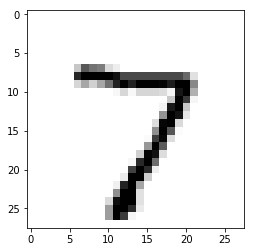

In [56]:
import matplotlib.pyplot as py
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
image = test_images[0]
py.imshow(image, cmap='Greys', interpolation='None')

In [57]:
test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255
result = n.evaluate(test_images[0])
print(result)
print("number of image is: ", numpy.argmax(result))

[1.16034760e-06 6.40368935e-06 1.40493558e-03 4.53424560e-04
 7.56356713e-08 6.90763528e-06 2.65327264e-09 9.99900703e-01
 1.61420548e-07 4.67405406e-05]
number of image is:  7
